In [57]:
##importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [7]:
car_data = pd.read_csv("car data.csv")

In [9]:
##Checking first few rows of the dataset
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
##Checking the total number of car names in the dataset
len(car_data['Car_Name'].unique())

98

In [20]:
##Checking the unique values in Fuel Type
car_data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [10]:
##getting info of the columns of dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [26]:
##Getting a statistical view of the dataset
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
##Getting count of null values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Data Visualization

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='count'>

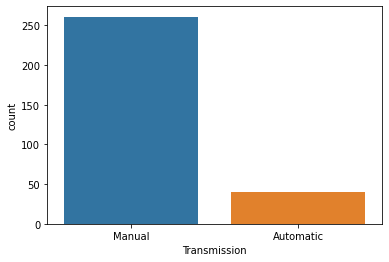

In [21]:
##Checking count of Manual and Automatic cars
sns.countplot("Transmission",data=car_data)

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

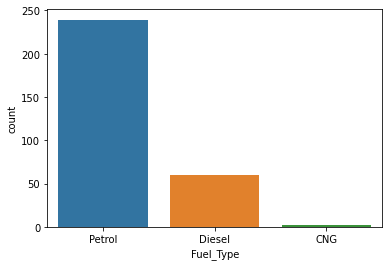

In [22]:
##Checking the number of cars running on Petrol, Diesel and CNG
sns.countplot("Fuel_Type",data=car_data)

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

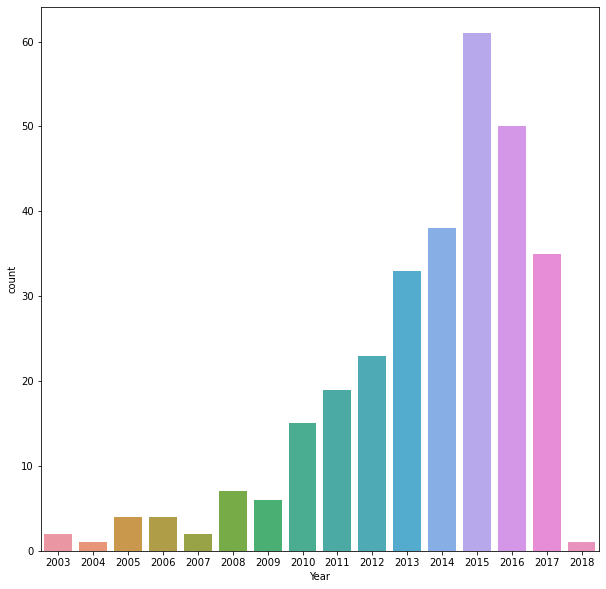

In [25]:
##Checking the sale of cars in each year
plt.figure(figsize=(10,10))
sns.countplot("Year",data=car_data)

# Data Analysis

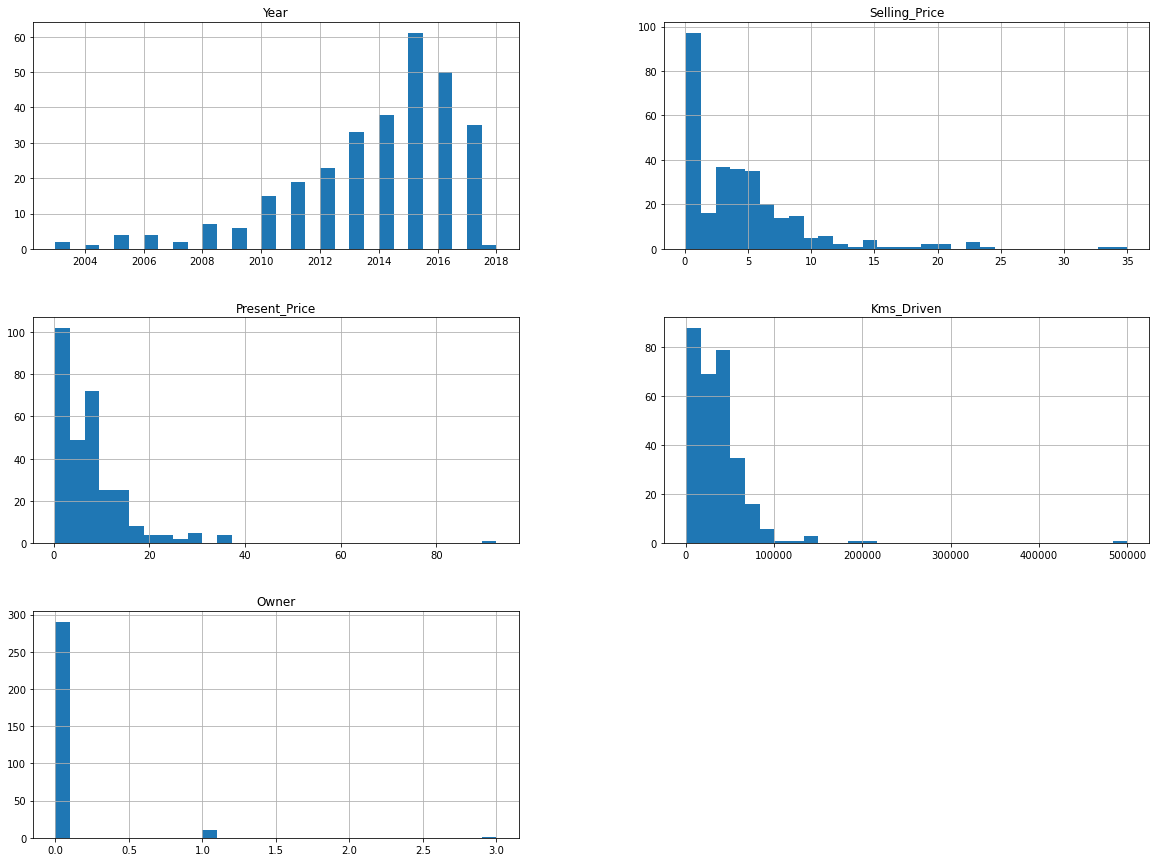

In [30]:
##checking distribution of the data
car_data.hist(bins = 30,figsize = (20,15))
plt.show()

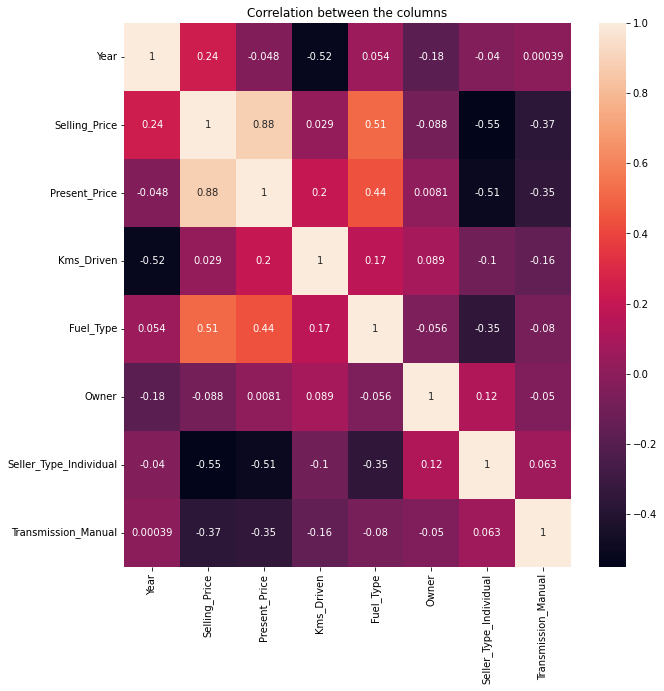

In [45]:
##Creating a correlation plot
plt.figure(figsize=(10,10))
sns.heatmap(car_data.corr(),annot=True)
plt.title("Correlation between the columns")
plt.show()

# Preprocessing Data

In [35]:
##Getting categorical columns in the data
categorical_features = car_data.select_dtypes(include="object").columns
categorical_features

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [37]:
##Checking unique values in the categorical features
for i in categorical_features:
    print(car_data[i].unique())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [38]:
##Encoding the data
##Manually encoding for Fuel Type
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [39]:
##One Hot Encoding for Seller and Transmission Features
car_data = pd.get_dummies(car_data,columns = ['Seller_Type','Transmission'],drop_first=True)

In [44]:
##Checking the dataset
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


# Splitting the data

In [46]:
##Splitting the data
X = car_data.drop(columns = ['Car_Name','Selling_Price'],axis=1)
Y = car_data['Selling_Price']

In [49]:
##Splitting into training and test data 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [51]:
X.shape,X_train.shape,X_test.shape

((301, 7), (240, 7), (61, 7))

# Scaling the data

In [52]:
##Using StandardScaler for scaling the data
scaler = StandardScaler()

In [53]:
##Scaling the training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Data

In [54]:
##Applying linear regression for training the data
line_reg = LinearRegression()

In [55]:
##Fitting the training data
line_reg.fit(X_train,Y_train)

LinearRegression()

In [56]:
##Doing prediction on training data
X_train_prediction = line_reg.predict(X_train)

In [66]:
##Doing prediction on test data
X_test_prediction = line_reg.predict(X_test)

# Model Evaluation

In [60]:
##Evaluating for training dataset
print("MAE :"  ,(mean_absolute_error(X_train_prediction,Y_train)))
print("MSE :"  ,(mean_squared_error(X_train_prediction,Y_train)))
print("R2 Score :",(r2_score(X_train_prediction,Y_train)))

MAE : 1.1761077496260204
MSE : 3.0672445262787904
R2 Score : 0.8687518544776351


In [62]:
##Evaluating for test dataset
print("MAE :"  ,(mean_absolute_error(X_test_prediction,Y_test)))
print("MSE :"  ,(mean_squared_error(X_test_prediction,Y_test)))
print("R2 Score :",(r2_score(X_test_prediction,Y_test)))

MAE : 1.2217615462332723
MSE : 3.528927253890651
R2 Score : 0.7881496929420144


# Plotting graph of Actual VS Predicted Price

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


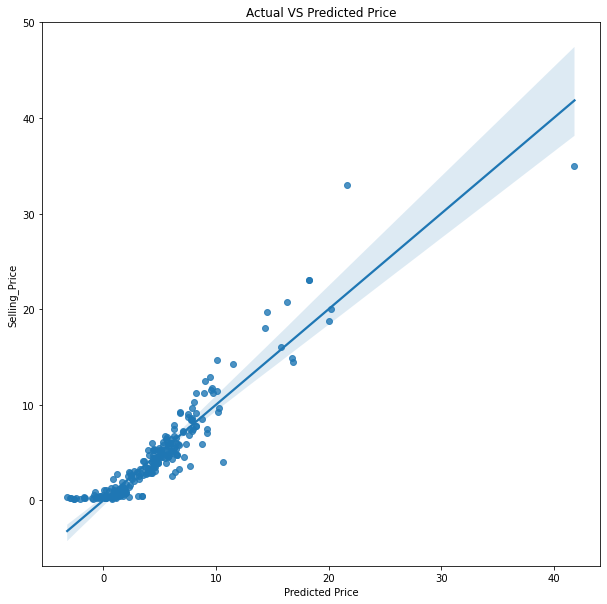

In [67]:
plt.figure(figsize=(10,10))
plt.title("Actual VS Predicted Price")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
sns.regplot(X_train_prediction,Y_train)
plt.show()